In [7]:
#based on the tutorial in the following page.
#http://nilearn.github.io/auto_examples/03_connectivity/plot_probabilistic_atlas_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-probabilistic-atlas-extraction-py

%matplotlib inline
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

# Load the functional datasets
data = datasets.fetch_adhd(n_subjects=1)

print('First subject resting-state nifti image (4D) is located at: %s' %
      data.func[0])

First subject resting-state nifti image (4D) is located at: /Users/admin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [8]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(data.func[0],
                                   confounds=data.confounds)

[NiftiMapsMasker.fit_transform] loading regions from /Users/admin/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]    0.1s, 0.0min: Loading resample_img...
________________________________________resample_img cache loaded - 0.4s, 0.0min
[Memory]    0.9s, 0.0min: Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


/Users/admin/.local/lib/python3.5/site-packages/nilearn/_utils/cache_mixin.py:291: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


In [9]:
print(time_series.shape)

(176, 39)


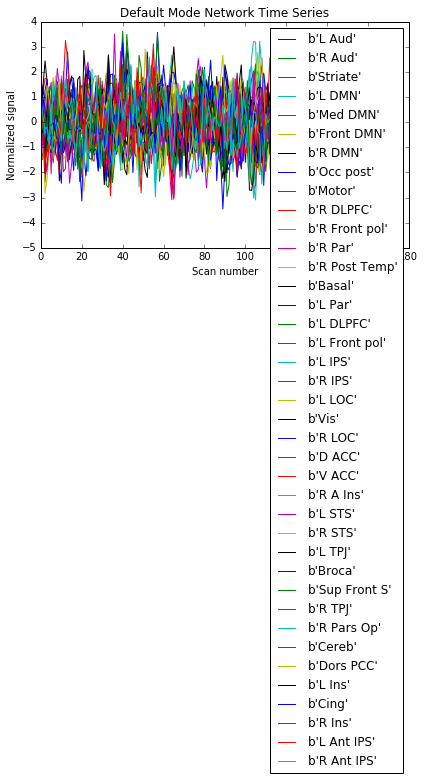

In [10]:
import matplotlib.pyplot as plt
for time_serie, label in zip(time_series.T, labels):
    plt.plot(time_serie, label=label)

plt.title('Default Mode Network Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.legend()
plt.tight_layout()

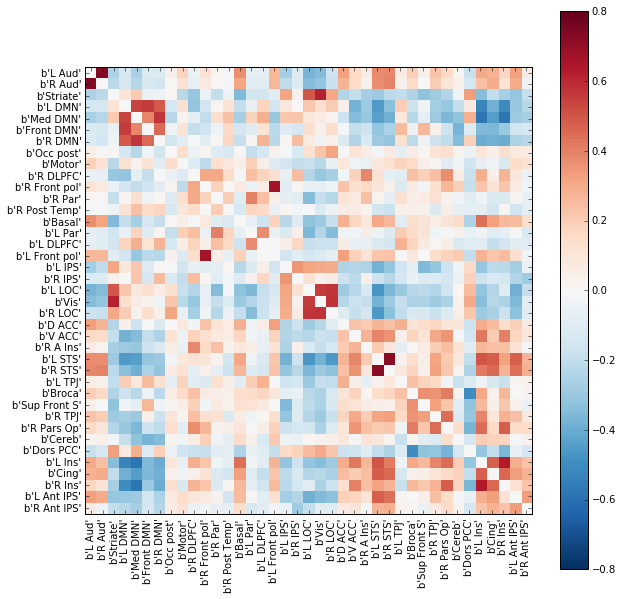

In [11]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plt.imshow(correlation_matrix, interpolation="nearest", cmap="RdBu_r",
           vmax=0.8, vmin=-0.8)
plt.colorbar()
# And display the labels
x_ticks = plt.xticks(range(len(labels)), labels, rotation=90)
y_ticks = plt.yticks(range(len(labels)), labels)

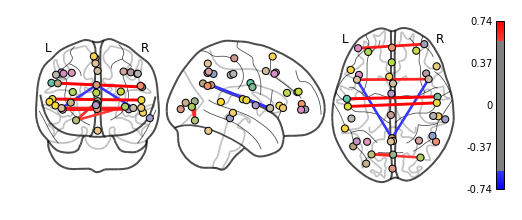

In [12]:
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 1% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="99%", colorbar=True)

plotting.show()